# SVC Experamentation

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
## read in dataframe
df = pd.read_csv('../data/finalized_customer_churn_records.csv')

In [49]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_France    10000 non-null  int64  
 13  Geography_Germany   10000 non-null  int64  
 14  Geography_Spain     10000 non-null  int64  
 15  Gender_Female       10000 non-null  int64  
 16  Gende

In [51]:
target_variable = df['Exited'].values
df.drop('Exited', axis=1, inplace=True)

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,0,1,1,0,0,1,0,0


## Split data into training and testing sets
* It is recommended to scale the dataset when using a support vector machine algorithm...in this case we will use a MinMaxScaler() to fit our dataset between 0 and 1

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

scaler = MinMaxScaler()

RANDOM_STATE = 3

over_sampler = RandomOverSampler(sampling_strategy='minority')
df, target_variable = over_sampler.fit_resample(df, target_variable)

X_train, X_test, y_train, y_test = train_test_split(df, target_variable, random_state=RANDOM_STATE, stratify=target_variable, test_size=0.30)

print(f'X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}')

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train shape: (11146, 20)
X_test shape: (4778, 20)
y_train shape: (11146,)
y_test shape: (4778,)


## Model implementation

In [53]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
# from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix


svc = SVC(random_state=RANDOM_STATE, probability=True)

%time
svc.fit(X_train, y_train)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 17.2 µs


SVC(probability=True, random_state=3)

In [54]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 3,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [55]:
svc_preds = svc.predict(X_test)

print(classification_report(y_test, svc_preds))
confusion_matrix_ = confusion_matrix(y_test, svc_preds)

print(f'False negative percentage:\n{round(confusion_matrix_[0][1]/len(y_test), 2)*100}')

              precision    recall  f1-score   support

           0       0.60      0.38      0.47      2389
           1       0.55      0.74      0.63      2389

    accuracy                           0.56      4778
   macro avg       0.57      0.56      0.55      4778
weighted avg       0.57      0.56      0.55      4778

False negative percentage:
31.0


From the basic SVC model we are getting a .57 recall score and a.56 f1-score. We'll tune the model next!

## Hyper-Parameter tuning
- Only the kernel parameter will be tuned for the first iteration since some of the other parameters are dependant on what kernel is chosen

In [56]:
params = {
    'kernel': ['rbf', 'sigmoid', 'poly']
}

svc_grid = GridSearchCV(estimator=svc, param_grid=params, cv=5, verbose=2, scoring=['f1_weighted', 'recall_macro'], refit='f1_weighted', n_jobs=-1)

svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .....................................kernel=sigmoid; total time=  45.2s
[CV] END .....................................kernel=sigmoid; total time=  45.6s
[CV] END .....................................kernel=sigmoid; total time=  47.8s
[CV] END .........................................kernel=rbf; total time= 1.2min
[CV] END .........................................kernel=rbf; total time= 1.3min
[CV] END .........................................kernel=rbf; total time= 1.3min
[CV] END .........................................kernel=rbf; total time= 1.3min
[CV] END .........................................kernel=rbf; total time= 1.3min
[CV] END .....................................kernel=sigmoid; total time=  37.2s
[CV] END .....................................kernel=sigmoid; total time=  39.6s
[CV] END ........................................kernel=poly; total time=  48.3s
[CV] END ........................................

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=3), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'sigmoid', 'poly']},
             refit='f1_weighted', scoring=['f1_weighted', 'recall_macro'],
             verbose=2)

In [57]:
svc_grid.best_params_

{'kernel': 'rbf'}

In [58]:
params = {
    'kernel': ['rbf'],
    'C': [1,5,10],
    'gamma': [.01, .1, 1, 10],
    'cache_size': [200]
}

svc_grid = GridSearchCV(estimator=svc, param_grid=params, cv=5, verbose=2, scoring=['f1_weighted', 'recall_macro'], refit='f1_weighted', n_jobs=-1)

svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........C=1, cache_size=200, gamma=0.01, kernel=rbf; total time= 1.3min
[CV] END .........C=1, cache_size=200, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END .........C=1, cache_size=200, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END ........C=1, cache_size=200, gamma=0.01, kernel=rbf; total time= 1.4min
[CV] END ........C=1, cache_size=200, gamma=0.01, kernel=rbf; total time= 1.4min
[CV] END ........C=1, cache_size=200, gamma=0.01, kernel=rbf; total time= 1.4min
[CV] END ........C=1, cache_size=200, gamma=0.01, kernel=rbf; total time= 1.4min
[CV] END .........C=1, cache_size=200, gamma=0.1, kernel=rbf; total time= 1.4min
[CV] END .........C=1, cache_size=200, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END .........C=1, cache_size=200, gamma=0.1, kernel=rbf; total time= 1.3min
[CV] END ...........C=1, cache_size=200, gamma=1, kernel=rbf; total time= 1.4min
[CV] END ...........C=1, cache_size=200, gamma=1

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=3), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'cache_size': [200],
                         'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']},
             refit='f1_weighted', scoring=['f1_weighted', 'recall_macro'],
             verbose=2)

In [59]:
print(svc_grid.best_params_)
svc_preds = svc_grid.predict(X_test)

print(f'False negative rate: {round(confusion_matrix(y_test, svc_preds)[0][1]/len(y_test), 2)*100}')

{'C': 1, 'cache_size': 200, 'gamma': 0.01, 'kernel': 'rbf'}
False negative rate: 0.0


In [60]:
params = {
    'C': [.01, .1, 1],
    'cache_size': [200],
    'kernel': ['rbf'],
    'gamma': [.0001, .001, .01]
}

svc_model = GridSearchCV(estimator=svc, param_grid=params, cv=5, n_jobs=-1, verbose=2, scoring=['recall_macro', 'f1_weighted'], refit='f1_weighted')

svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test, svc_pred)

print(f'False negative rate: {round(confusion_matrix_[0][1]/len(y_test), 2)*100}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...C=0.01, cache_size=200, gamma=0.0001, kernel=rbf; total time= 1.1min
[CV] END ....C=0.01, cache_size=200, gamma=0.001, kernel=rbf; total time= 1.1min
[CV] END ....C=0.01, cache_size=200, gamma=0.001, kernel=rbf; total time= 1.1min
[CV] END ....C=0.01, cache_size=200, gamma=0.001, kernel=rbf; total time= 1.1min
[CV] END ...C=0.01, cache_size=200, gamma=0.0001, kernel=rbf; total time= 1.1min
[CV] END ...C=0.01, cache_size=200, gamma=0.0001, kernel=rbf; total time= 1.2min
[CV] END ...C=0.01, cache_size=200, gamma=0.0001, kernel=rbf; total time= 1.2min
[CV] END ...C=0.01, cache_size=200, gamma=0.0001, kernel=rbf; total time= 1.2min
[CV] END ....C=0.01, cache_size=200, gamma=0.001, kernel=rbf; total time=  54.1s
[CV] END ....C=0.01, cache_size=200, gamma=0.001, kernel=rbf; total time=  55.6s
[CV] END .....C=0.01, cache_size=200, gamma=0.01, kernel=rbf; total time=  54.1s
[CV] END .....C=0.01, cache_size=200, gamma=0.01,

In [61]:
svc_model.best_params_

{'C': 1, 'cache_size': 200, 'gamma': 0.01, 'kernel': 'rbf'}

### Final SVC model

In [65]:
svc_model = SVC(C=1, kernel='rbf', gamma=.01, cache_size=200, random_state=RANDOM_STATE)

%time
svc_model.fit(X_train, y_train)


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.87 µs


SVC(C=1, gamma=0.01, random_state=3)

## Scoring

In [66]:
svc_preds = svc_model.predict(X_test)
print(classification_report(y_test, svc_preds))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2389
           1       1.00      0.93      0.96      2389

    accuracy                           0.96      4778
   macro avg       0.97      0.96      0.96      4778
weighted avg       0.97      0.96      0.96      4778



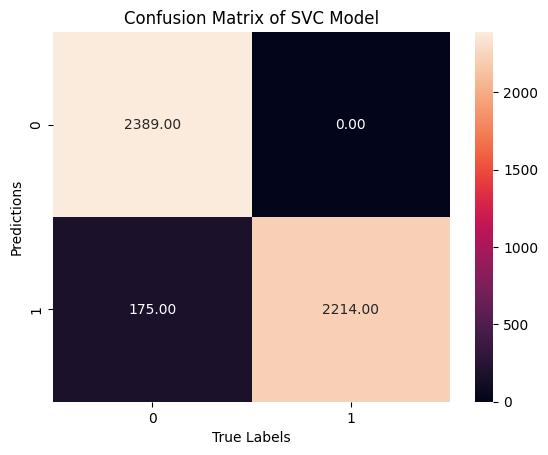

False negative rate: 0.0


In [67]:
confusion_matrix_ = confusion_matrix(y_test, svc_preds)

sns.heatmap(data=confusion_matrix_, annot=True, fmt='.2f')
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Confusion Matrix of SVC Model')
plt.show()

print(f'False negative rate: {round(confusion_matrix_[0][1]/len(y_test), 2)*100}')

The tuning has bought the false negative rate down to 0 and has brought both the recall and f-1 score up to .96. This betters our baseline model of recall and f-1 scores of .85 and a false negative rate of ~12%!

## Save model

In [63]:
import pickle

with open('../final_models/svc_model.pkl', 'wb') as model:
    pickle.dump(svc_model, model)